In [1]:
from dask.distributed import Client

In [2]:
client = Client(threads_per_worker=1)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33251 instead
  warnings.warn(


In [3]:
client

<Client: 'tcp://127.0.0.1:43901' processes=12 threads=12, memory=46.00 GiB>

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
cd /g/data/tm70/as2285/om3-scripts/expts_manager/r_25march/

/g/data/tm70/as2285/om3-scripts/expts_manager/r_25march


In [6]:
! grep remap ndtd_2/ice_in

  advection = "remap"
  maskhalo_remap = .true.


In [7]:
! grep ndtd ndtd_2/ice_in

    ndtd = 2


In [8]:
! grep cf ndtd_2/ice_in

In [9]:
! grep DT ndtd_2/archive/output000/MOM_parameter_doc.all

DT = 1350.0                     !   [s]
                                ! be an integer fraction of the forcing time-step (DT_FORCING in ocean-only mode
DT_THERM = 1350.0               !   [s] default = 1350.0
                                ! The thermodynamic and tracer advection time step. Ideally DT_THERM should be
                                ! an integer multiple of DT and less than the forcing or coupling time-step,
                                ! unless THERMO_SPANS_COUPLING is true, in which case DT_THERM can be an integer
                                ! multiple of the coupling timestep.  By default DT_THERM is set to DT.
                                ! that is less than or equal to DT_THERM.
DTBT_RESET_PERIOD = 0.0         !   [s] default = 1350.0
                                ! The period between recalculations of DTBT (if DTBT <= 0). If DTBT_RESET_PERIOD
                                ! is negative, DTBT is set based only on information available at
           

In [10]:
grid_ds = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc')

In [11]:
grid_ds=grid_ds.rename({'xt_ocean':'ni', 'yt_ocean':'nj'})

In [12]:
inst_files_1 = ! ls ndtd_2/archive/output*/access-om3.cice_inst.1901-03-*.nc

In [13]:
inst_files_1

['ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-01350.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-02700.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-04050.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-05400.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-06750.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-08100.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-09450.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-10800.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-12150.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-13500.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-14850.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-16200.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-17550.nc',
 'ndtd_2/archive/output000/access-om3.cice_inst.1901-03-26-18900.nc',
 'ndtd_2/archive/out

In [14]:
inst_ds_1 = xr.open_mfdataset(inst_files_1)

inst_ds_1['TLON']=grid_ds['geolon_t']

inst_ds_1['TLAT']=grid_ds['geolat_t']

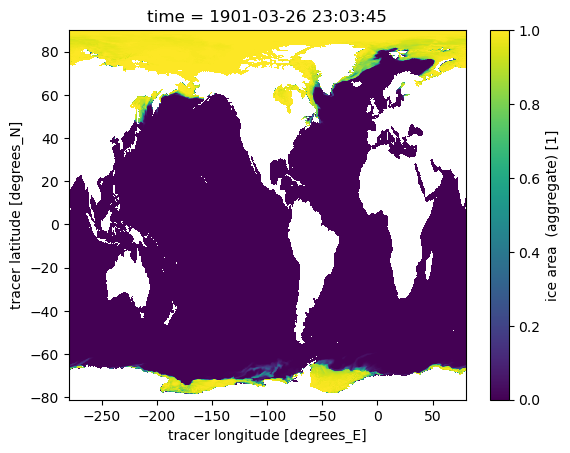

In [15]:
inst_ds_1.isel(time=61).aice_1.plot(x='geolon_t',y='geolat_t')

In [16]:
crash_point_1 = inst_ds_1.isel(ni=1068,nj=1001)


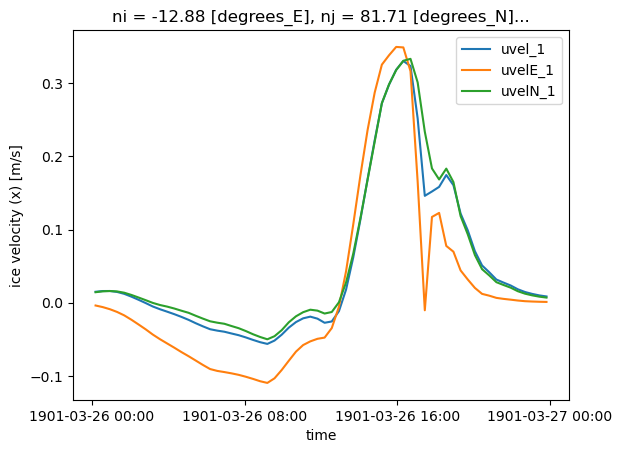

In [17]:
for v in ['uvel_1',#'vvel_1', 
          'uvelE_1', #'vvelE_1', 
          'uvelN_1', #'vvelN_1'
         ]:
    crash_point_1[v].isel(time=slice(-100,None)).plot(label=v)

plt.legend()

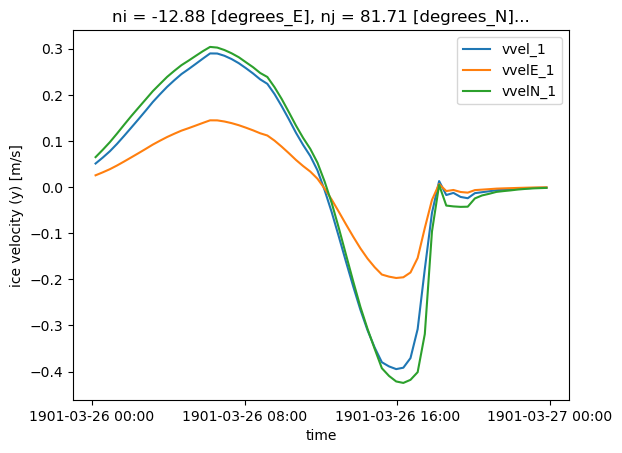

In [19]:
for v in ['vvel_1', 
          'vvelE_1', 
          'vvelN_1'
         ]:
    crash_point_1[v].isel(time=slice(-100,None)).plot(label=v)

plt.legend()

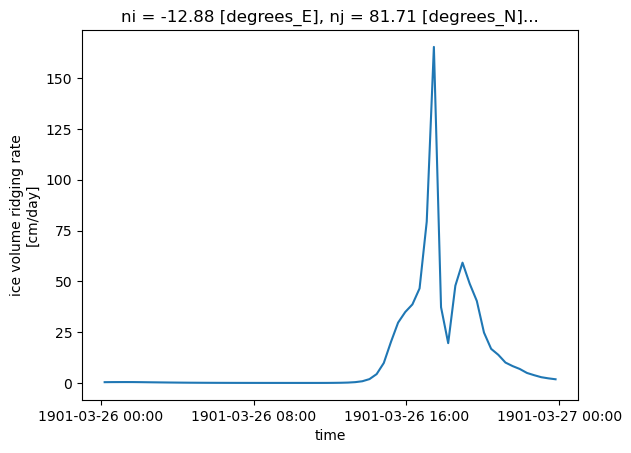

In [20]:
crash_point_1.dvirdgdt_1.plot()

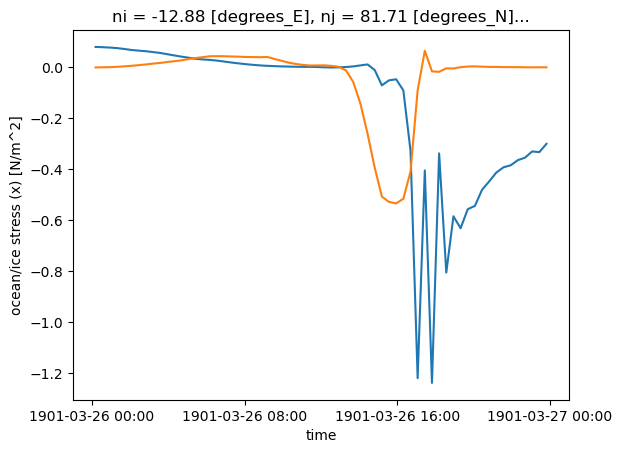

In [19]:
crash_point_1.strintxE_1.plot()
crash_point_1.strocnxE_1.plot()

In [22]:
inst_ds = inst_ds_1

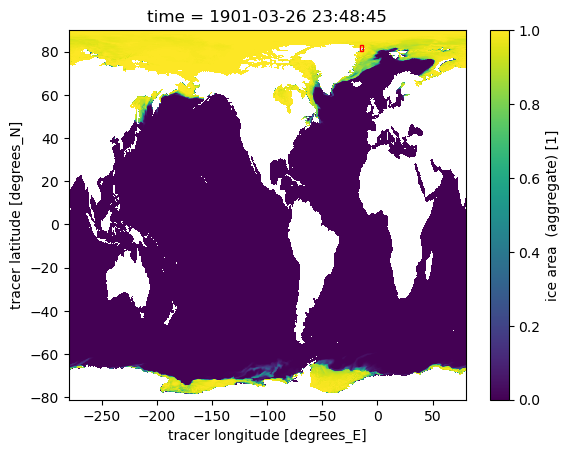

In [23]:
plt.figure()
ax = plt.subplot()

inst_ds.aice_1.isel(time=-1).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
# plt.ylim([75,85])
# plt.xlim([-20,-10])

ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='red', fill=None))
ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.1, height=0.1, color='black', fill=None))

plt.show()

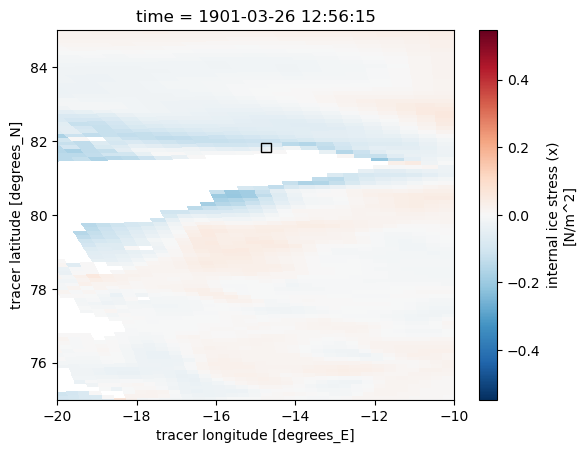

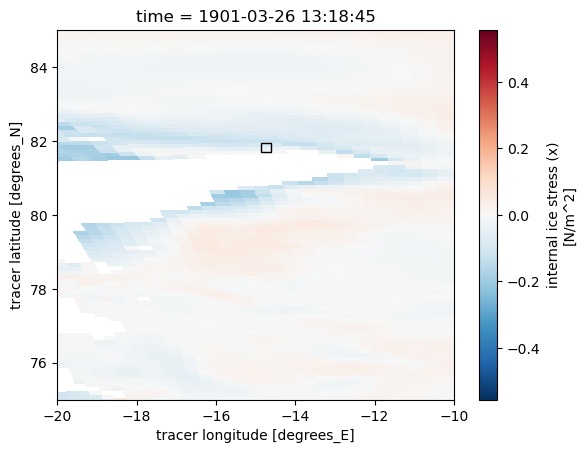

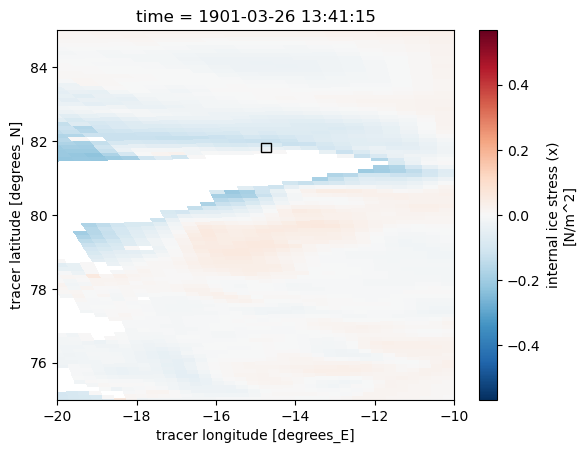

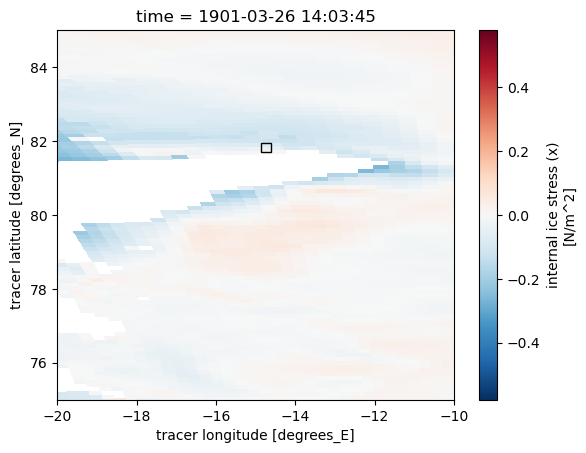

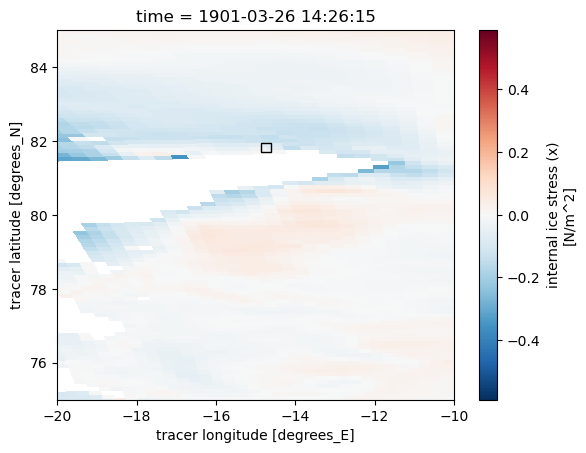

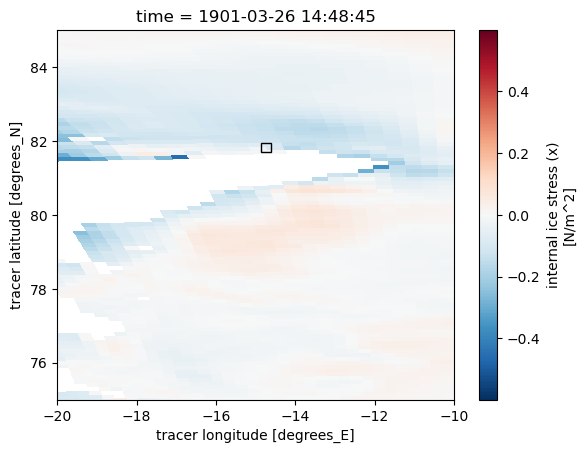

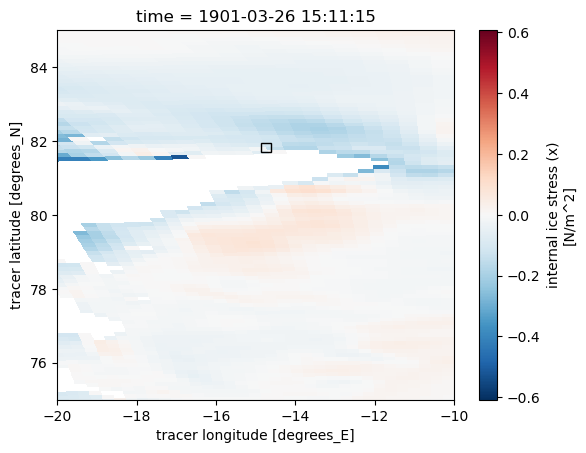

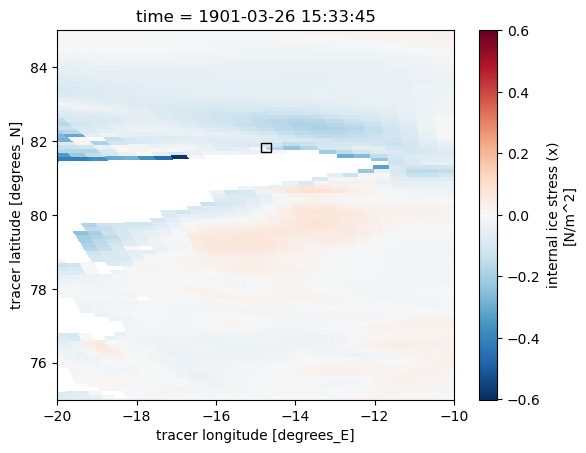

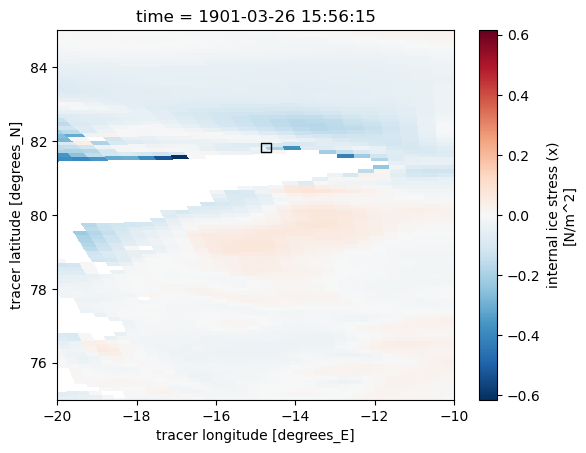

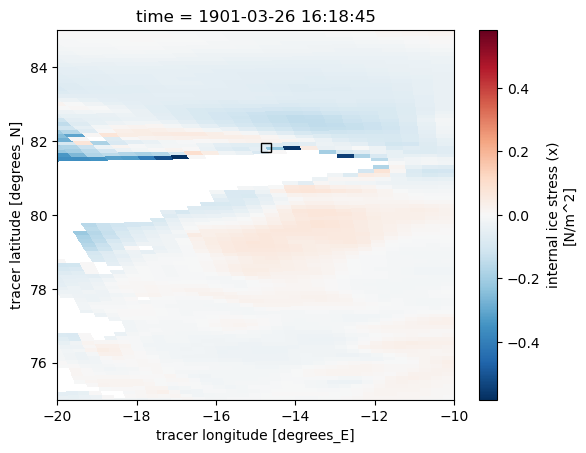

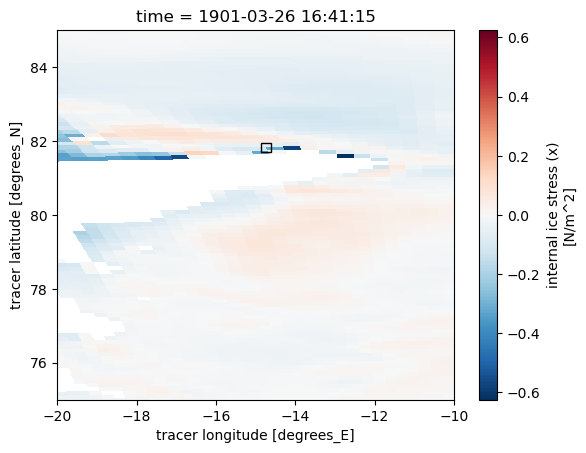

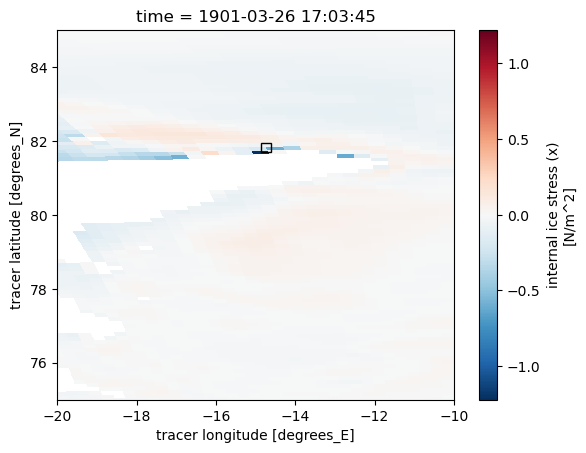

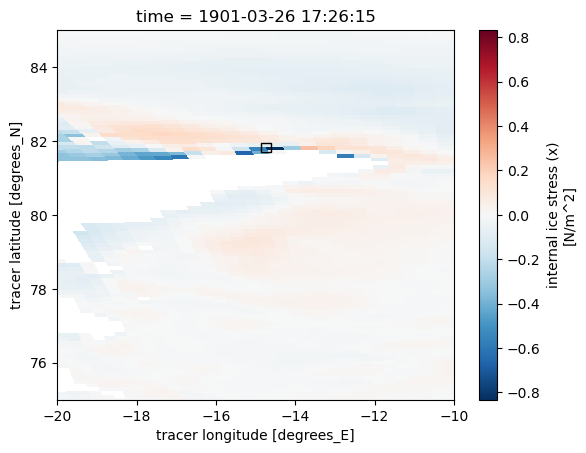

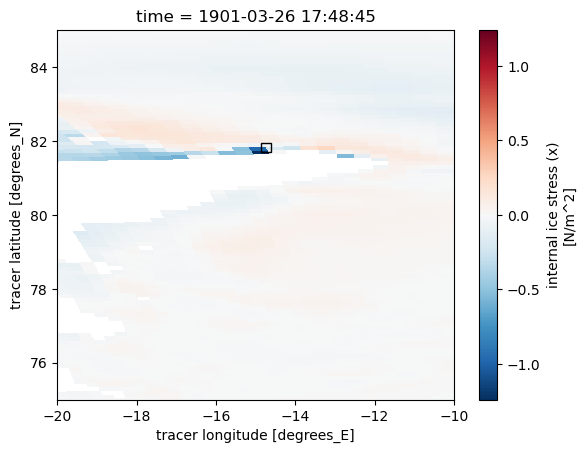

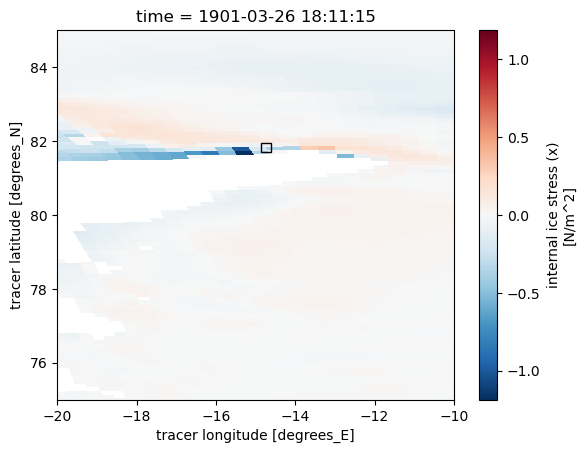

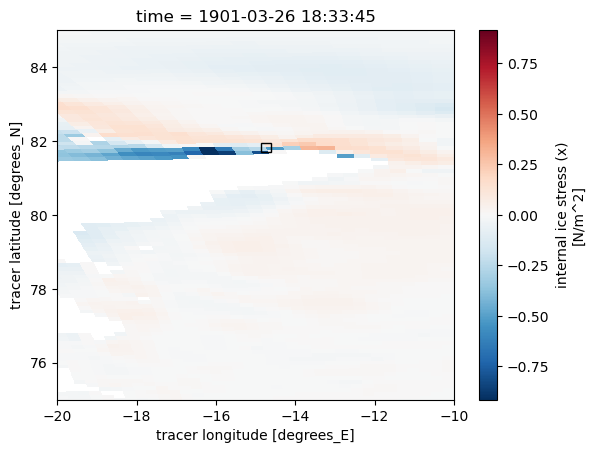

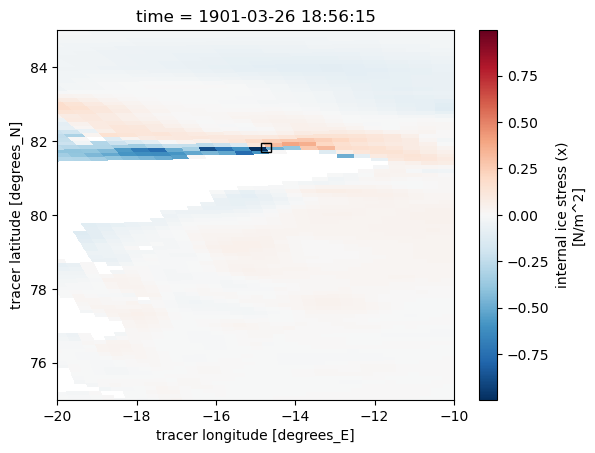

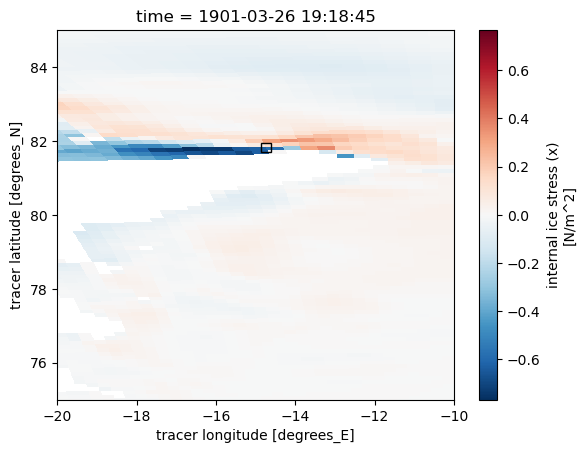

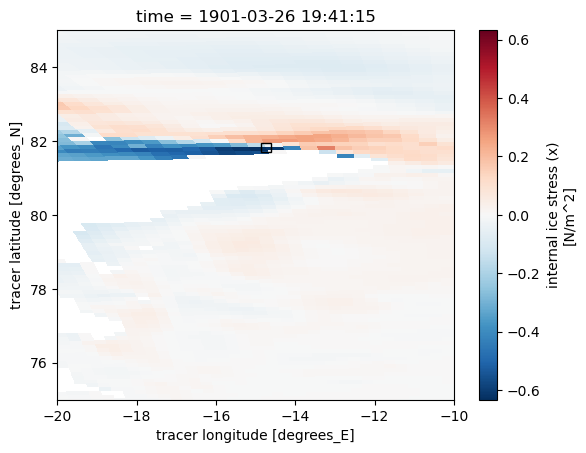

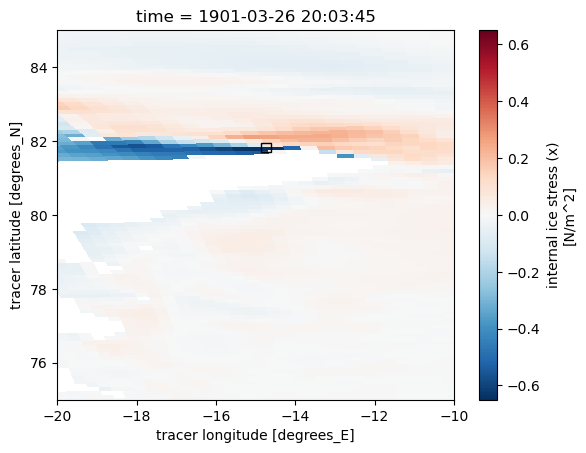

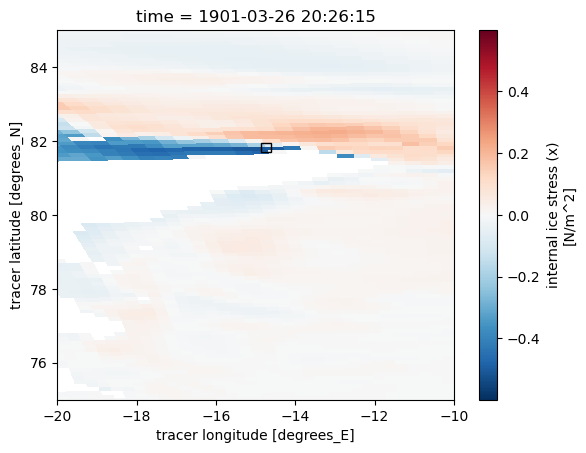

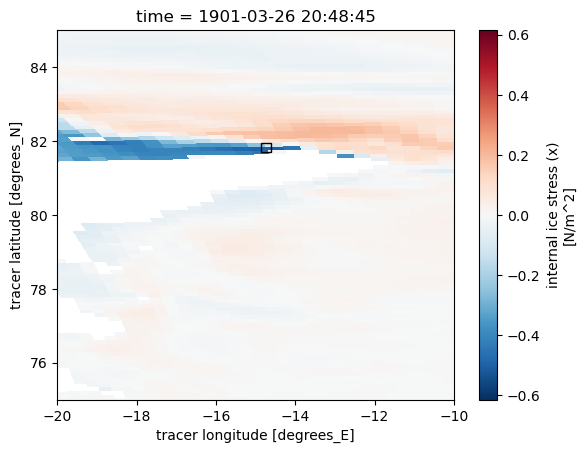

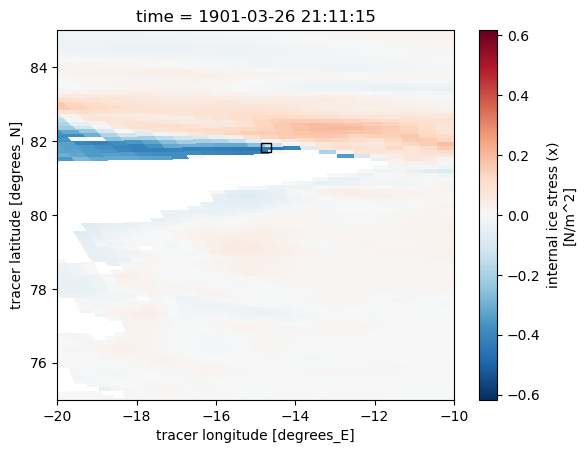

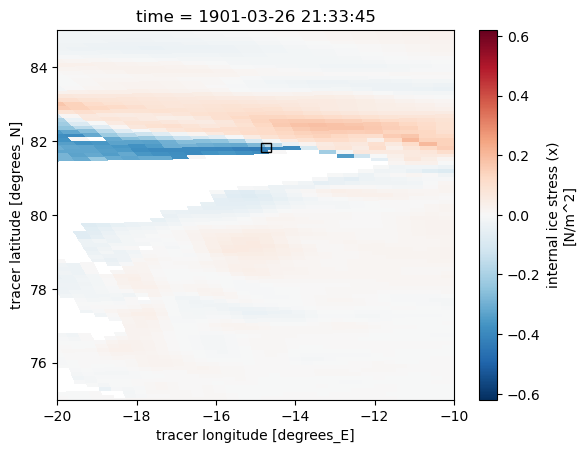

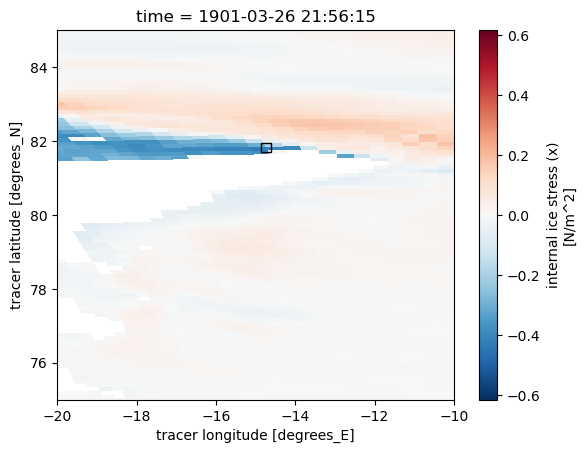

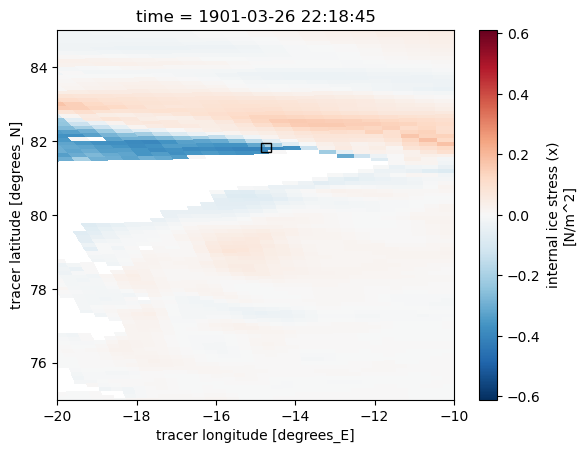

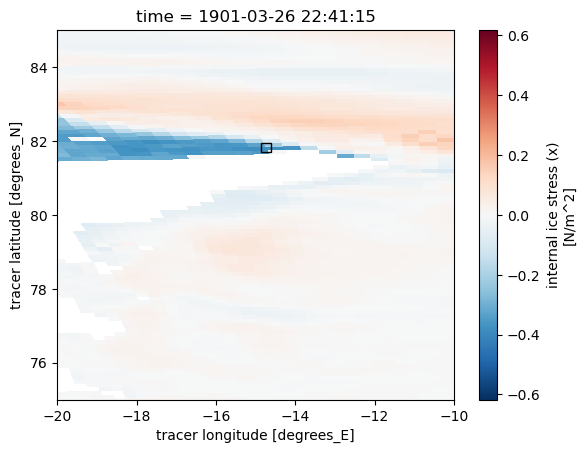

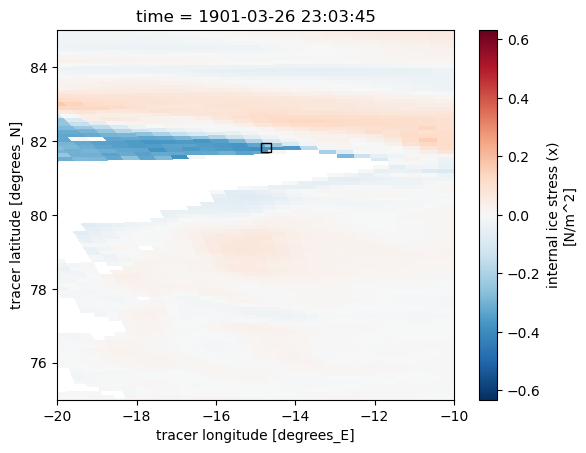

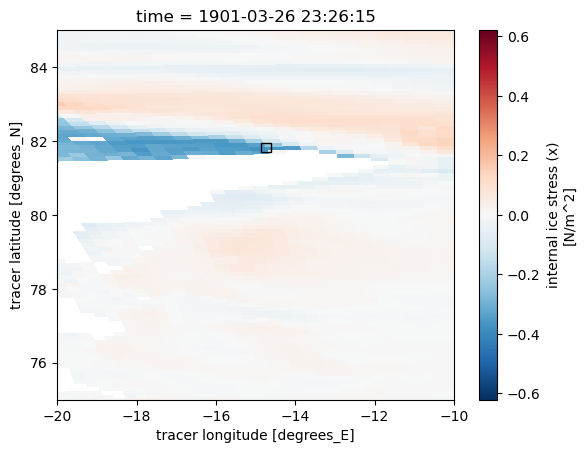

In [23]:
for t in range(-30,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.strintxE_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


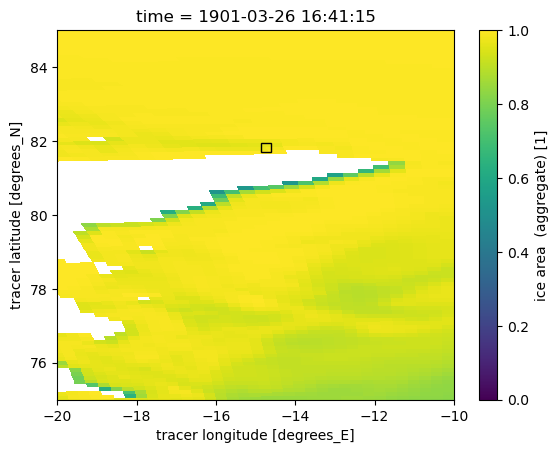

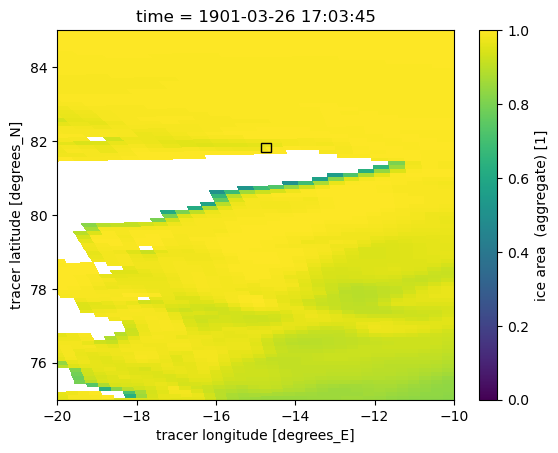

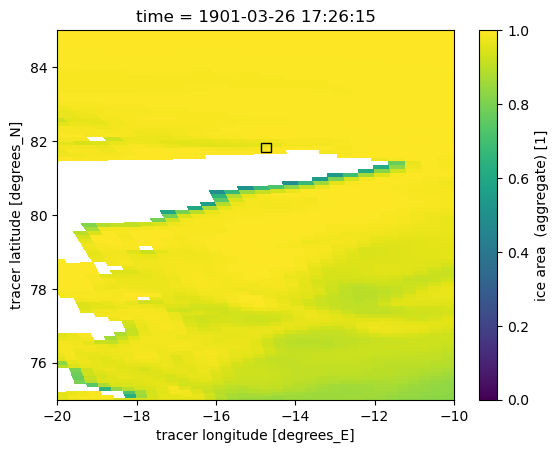

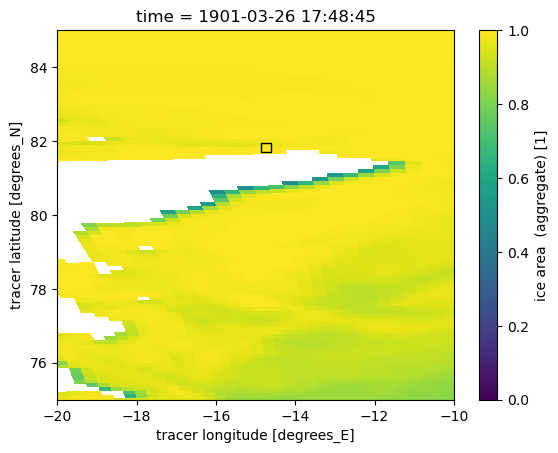

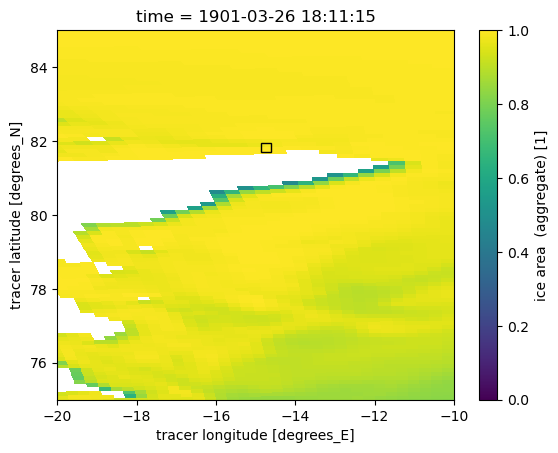

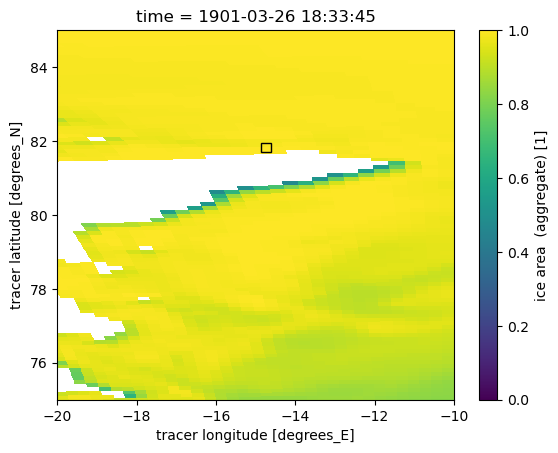

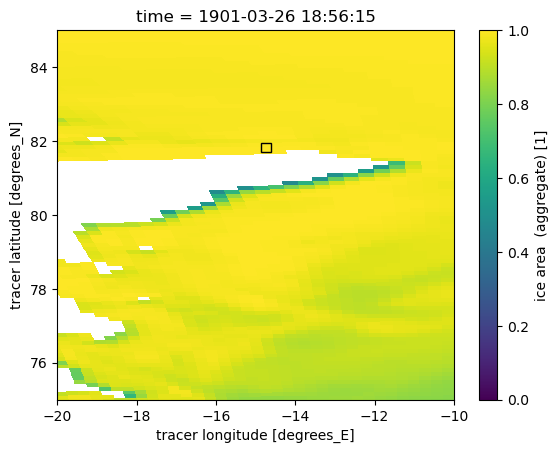

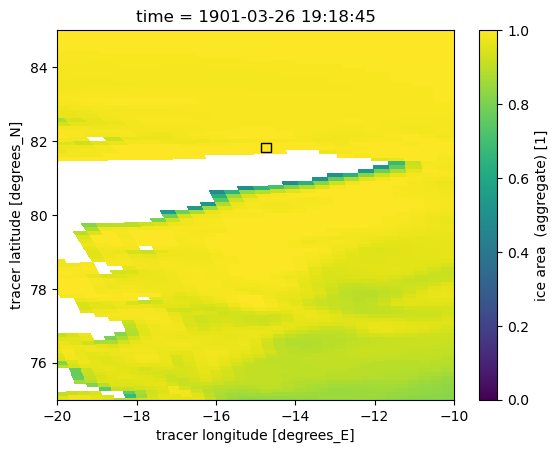

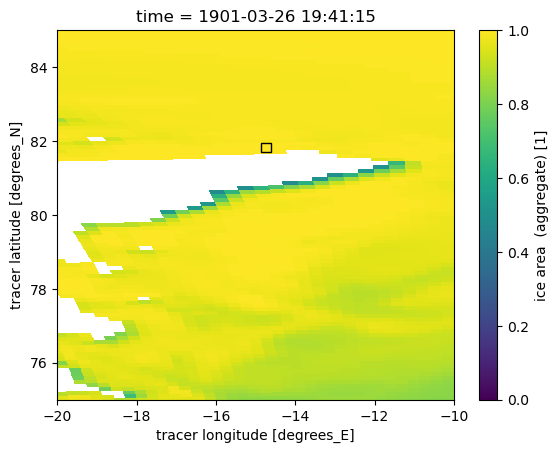

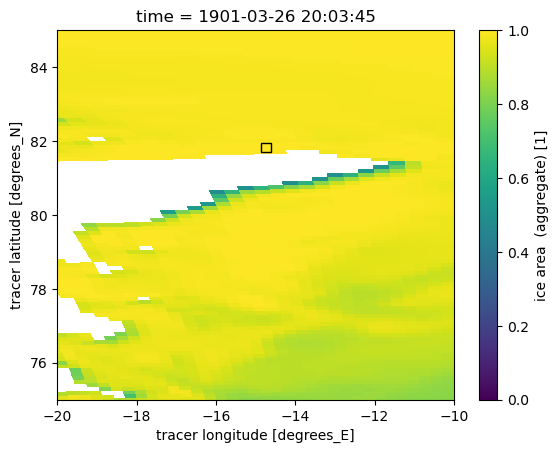

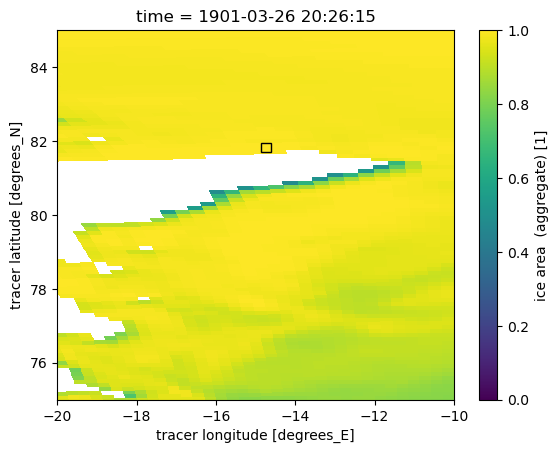

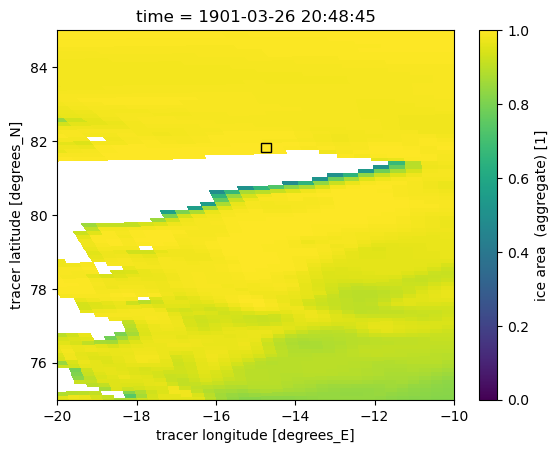

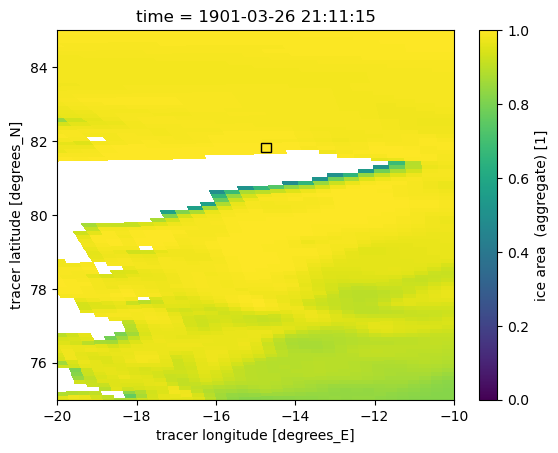

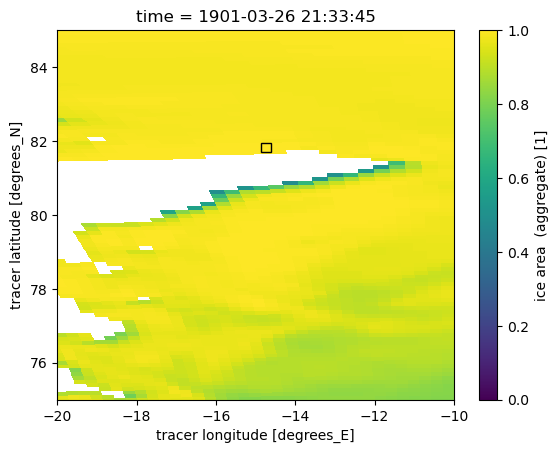

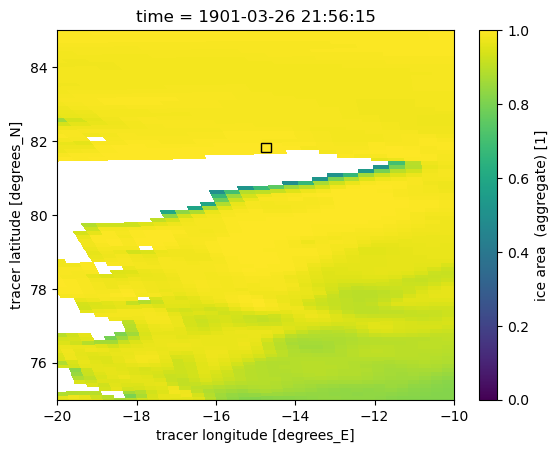

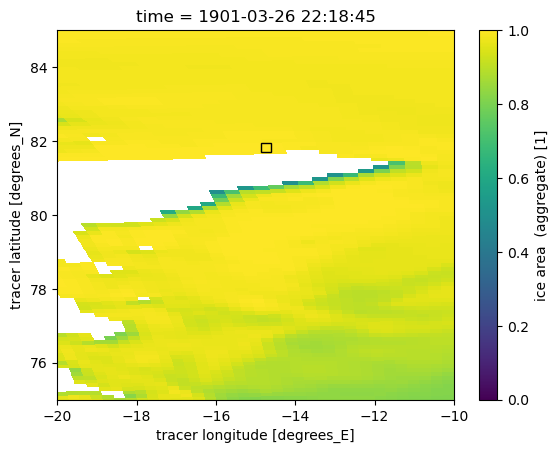

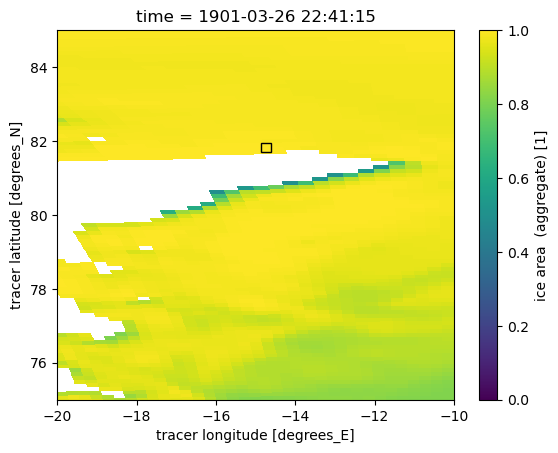

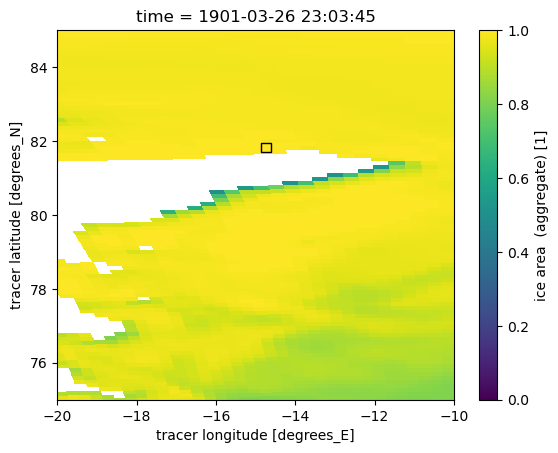

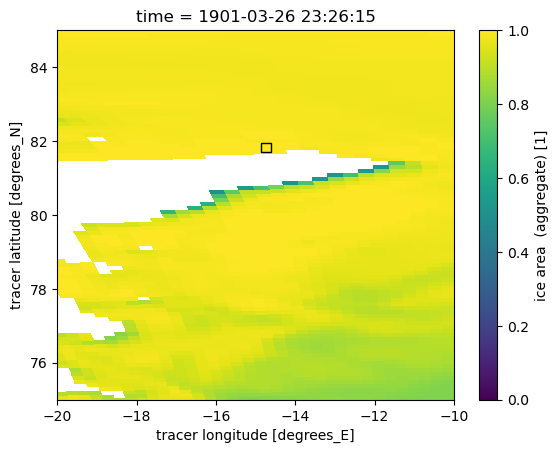

In [24]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.aice_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


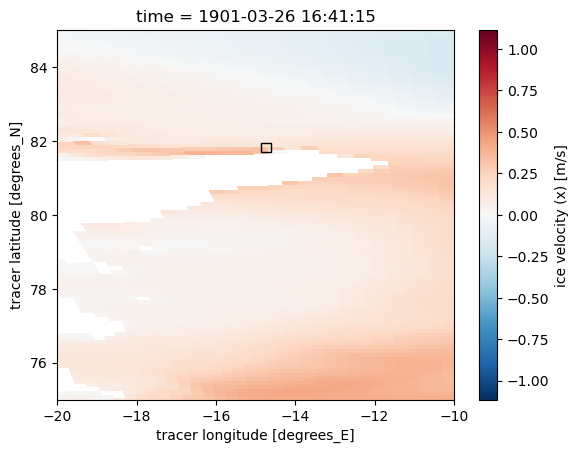

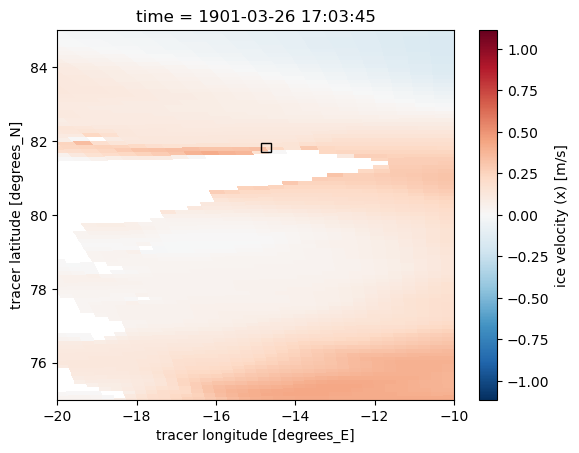

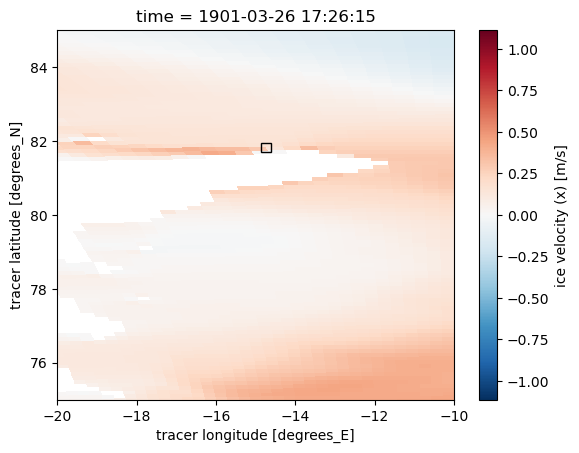

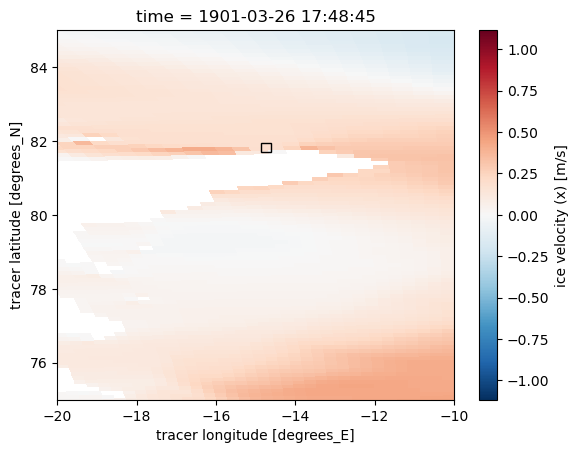

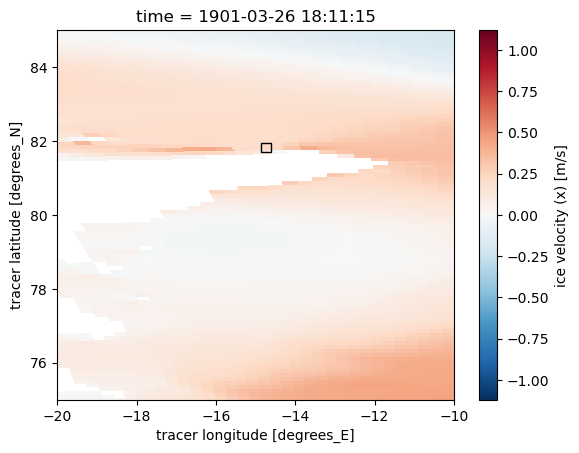

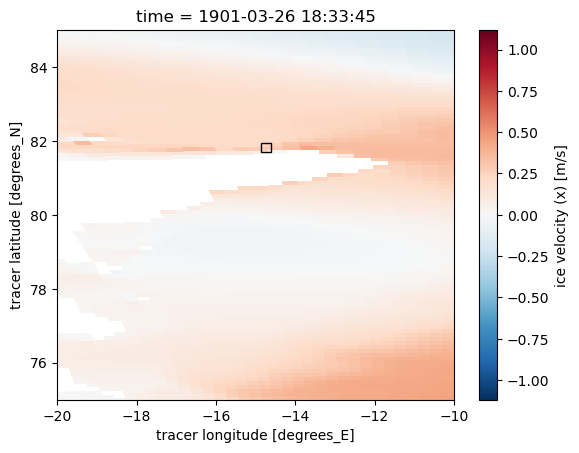

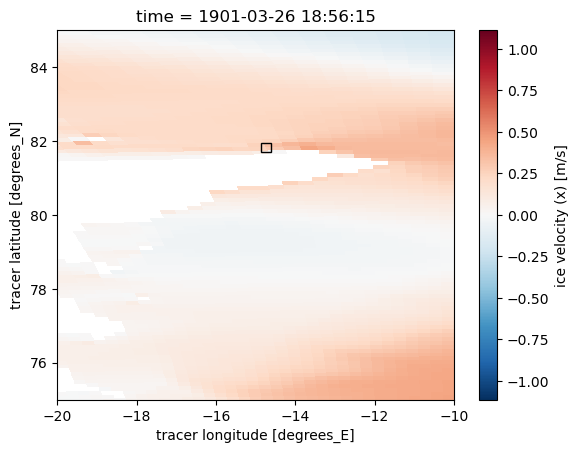

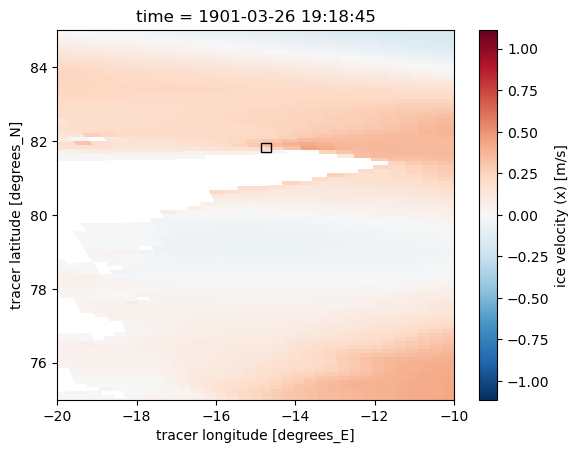

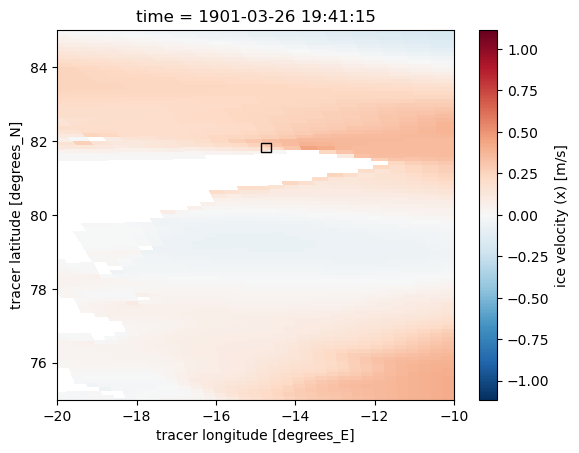

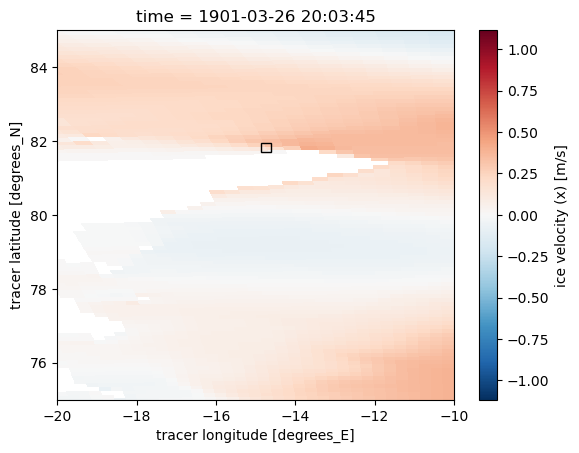

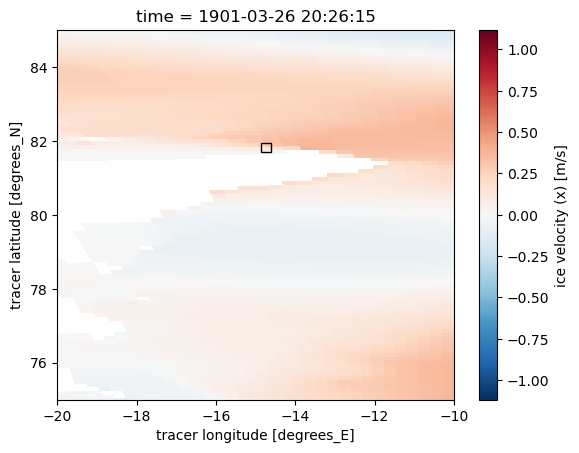

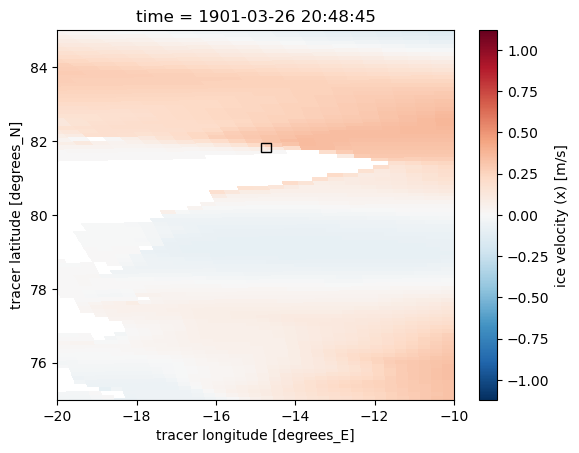

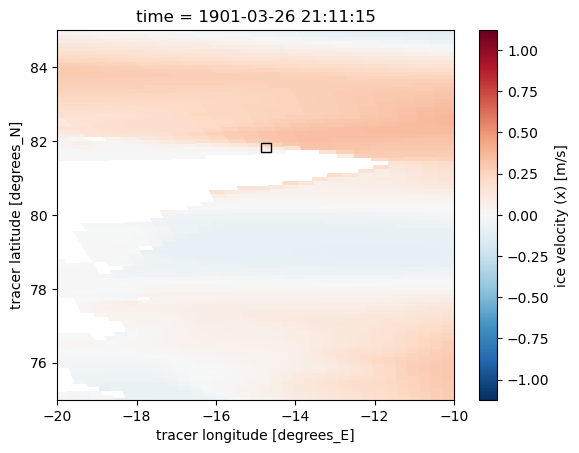

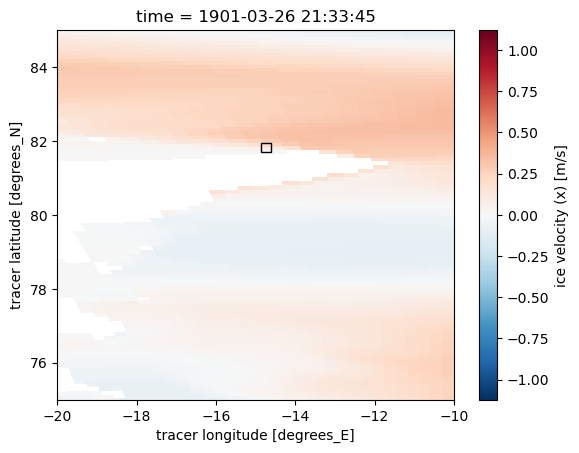

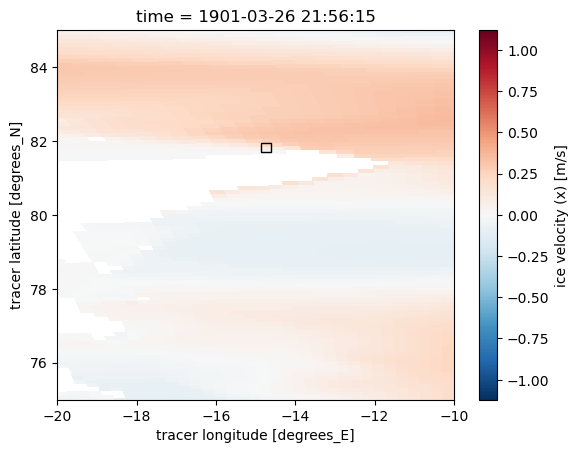

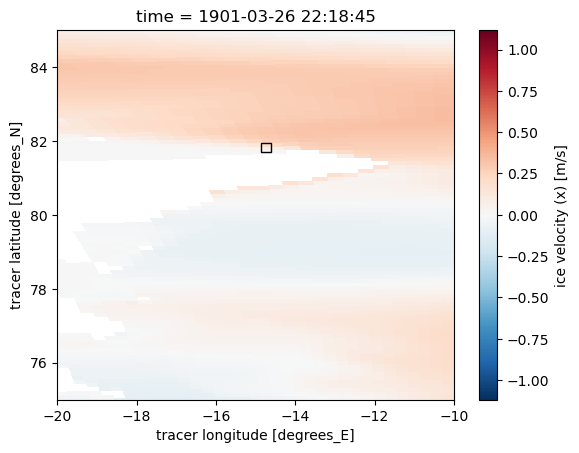

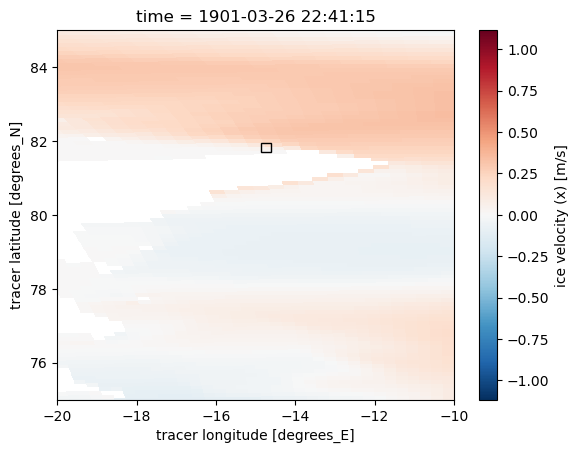

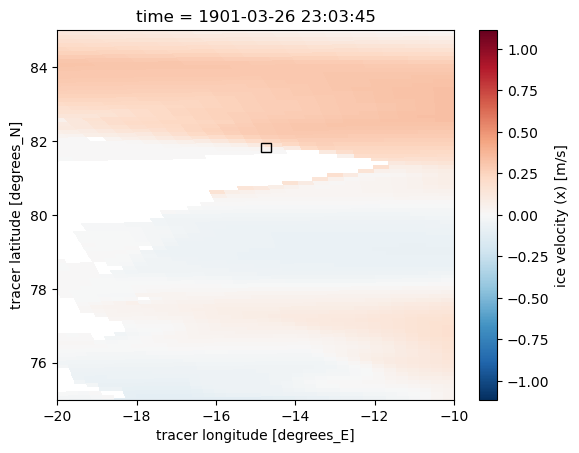

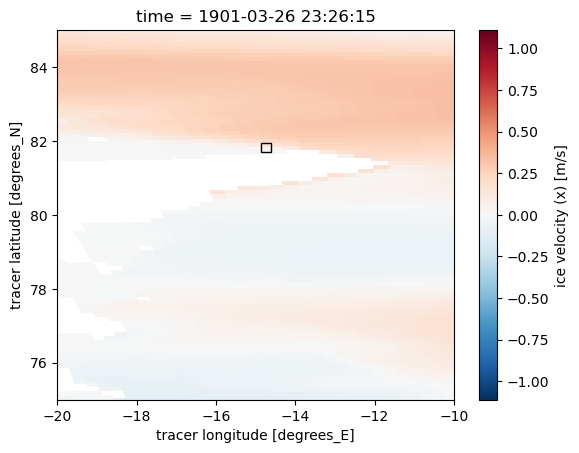

In [25]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.uvelE_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


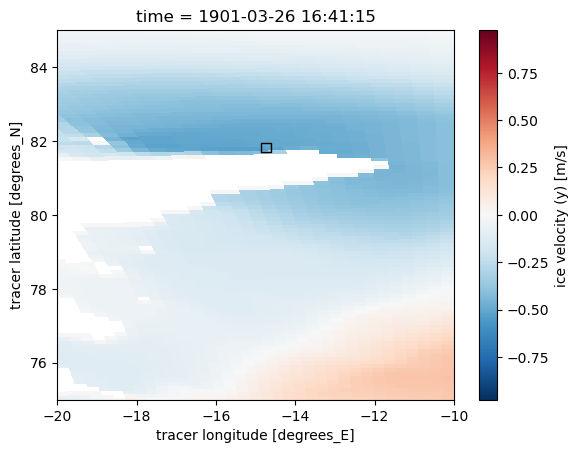

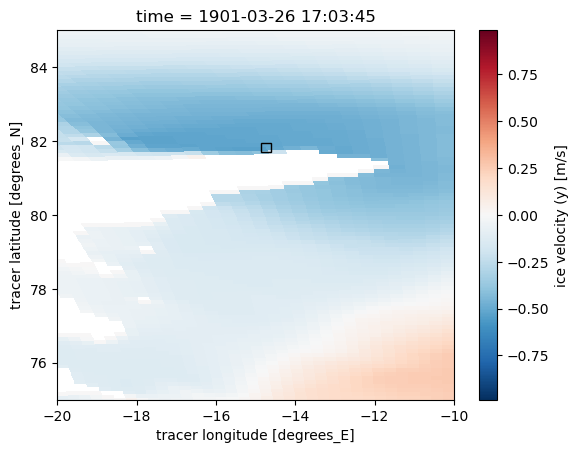

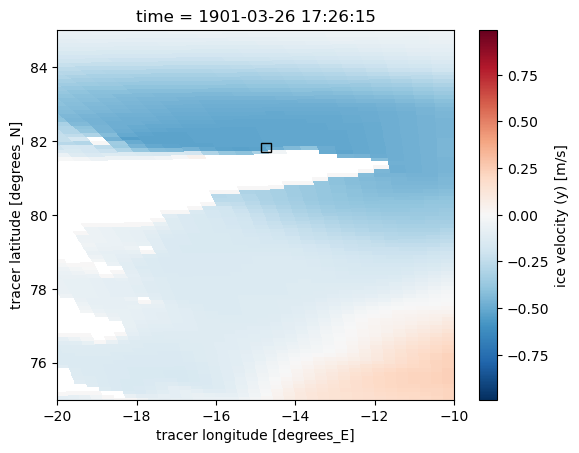

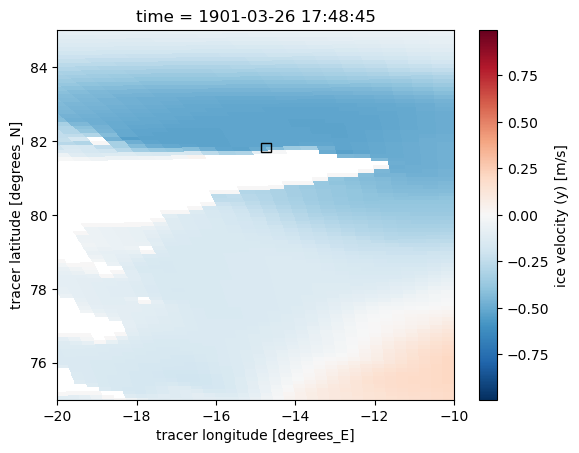

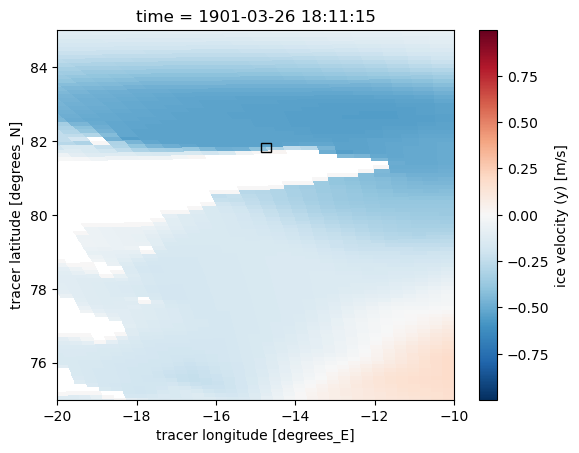

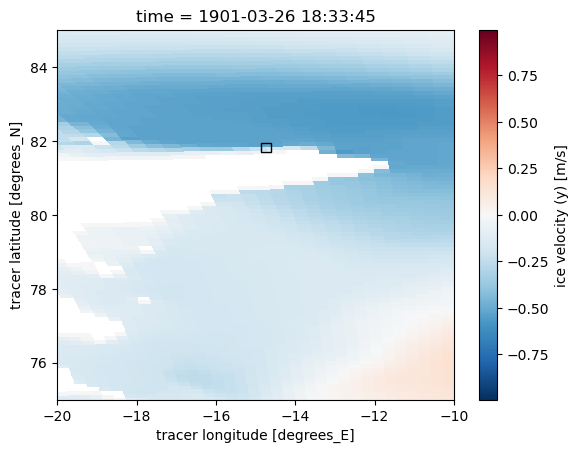

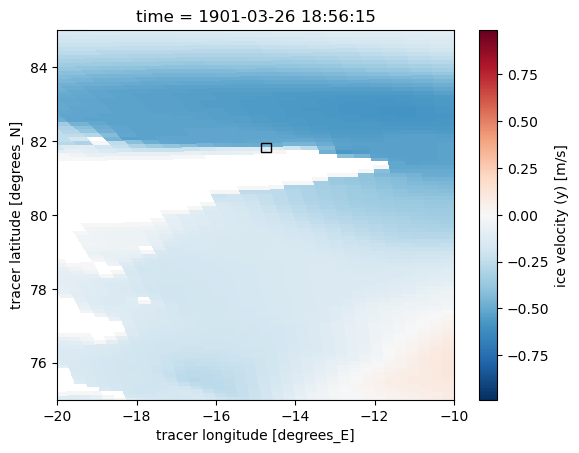

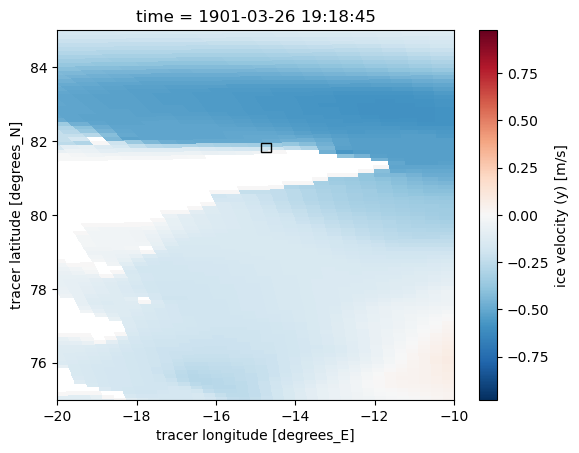

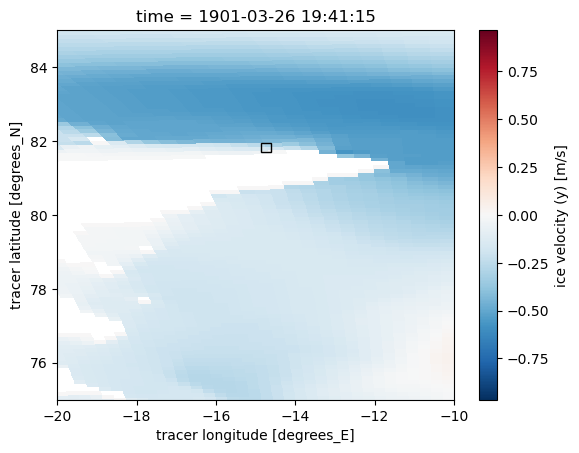

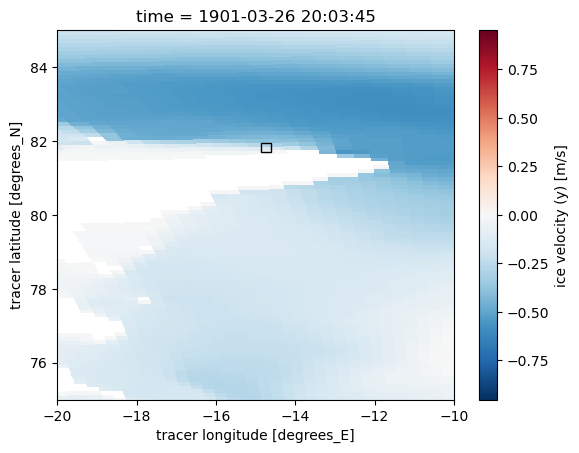

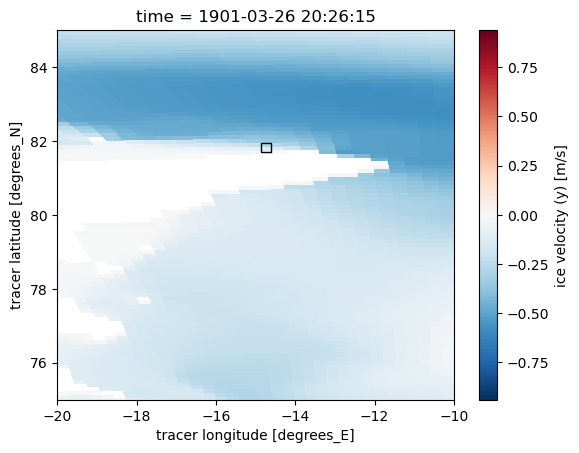

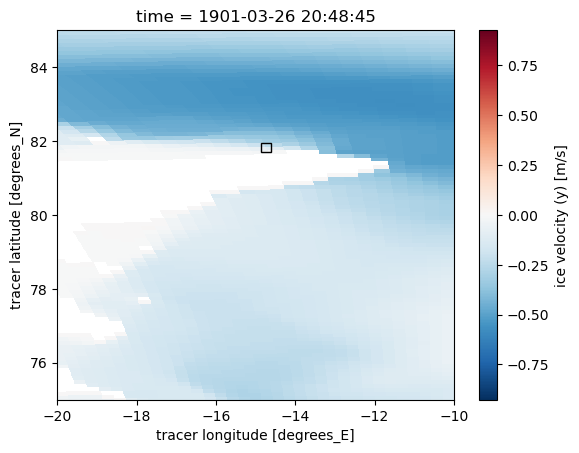

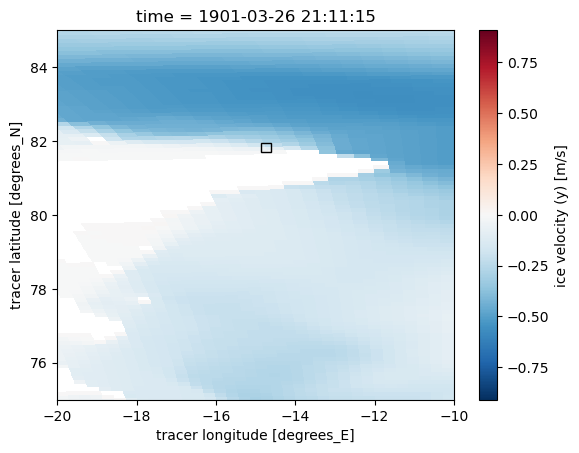

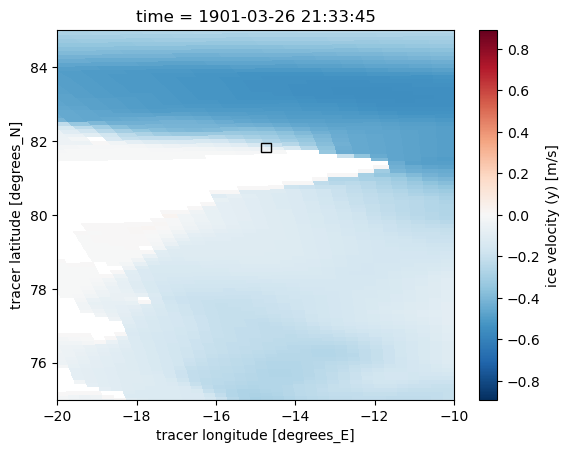

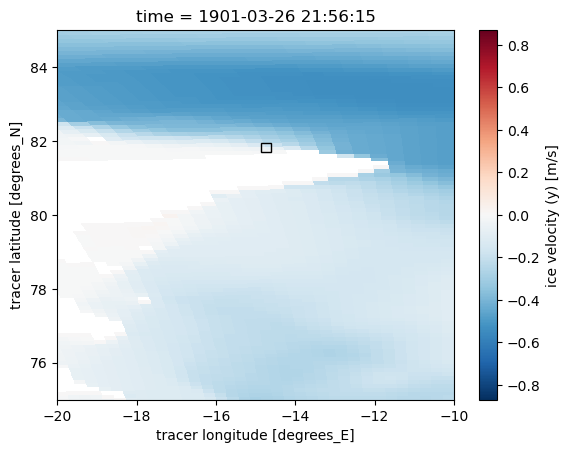

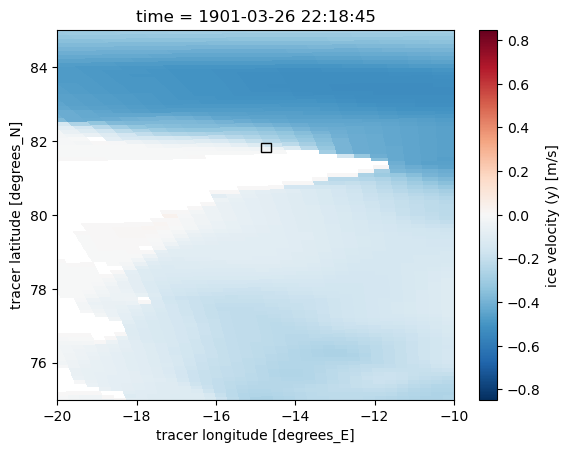

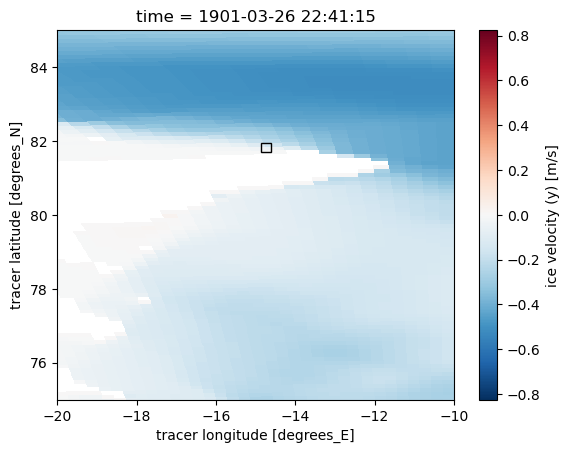

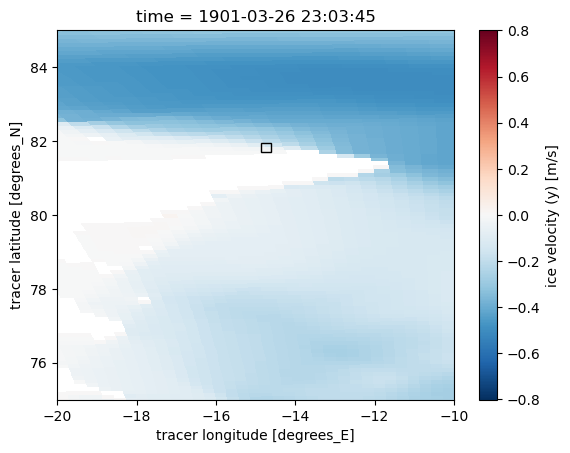

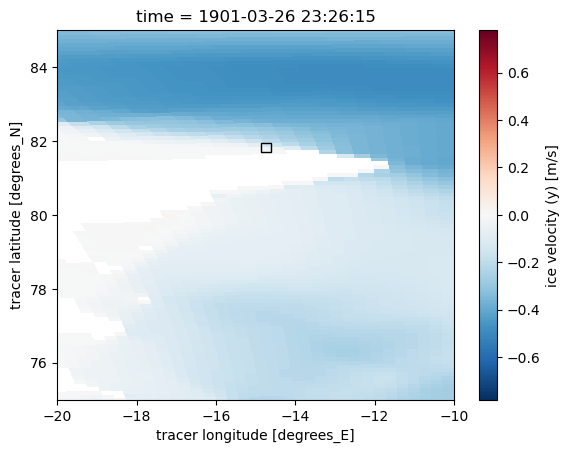

In [26]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.vvelN_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()
